In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import datetime as dt
import pandas_datareader as web

In [2]:
index = '^STOXX50E'
start_train = dt.datetime(2007,7,1)
end_train = dt.datetime(2017,7,1)

#data for training
data_train = web.DataReader(index, 'yahoo',start_train,end_train) 

start_test = dt.datetime(2017,7,2)
end_test = dt.datetime(2021,5,1)

#data for testing
data_test = web.DataReader(index, 'yahoo',start_test,end_test)

#data_train.tail()

In [3]:
#get the daily change in percent
data_train['Change'] = data_train['Close'].pct_change()

In [4]:
#reset index and get date as individual column
data_train.reset_index(inplace=True)

In [5]:
#split the date down to 
data_train['mdate'] = data_train['Date'].dt.to_period('M')

In [6]:
data_train['ProdChange'] = data_train['Change'] +1
data_train

,Date,High,Low,Open,Close,Volume,Adj Close,Change,mdate,ProdChange
0,2007-07-02,4479.810059,4450.290039,4471.799805,4470.259766,0.0,4470.259766,NaN,2007-07,NaN
1,2007-07-03,4522.479980,4483.379883,4483.379883,4513.009766,0.0,4513.009766,0.009563,2007-07,1.009563
2,2007-07-04,4530.200195,4515.250000,4519.419922,4524.240234,0.0,4524.240234,0.002488,2007-07,1.002488
3,2007-07-05,4537.930176,4486.720215,4533.000000,4491.870117,0.0,4491.870117,-0.007155,2007-07,0.992845
4,2007-07-06,4524.450195,4486.500000,4492.089844,4524.450195,0.0,4524.450195,0.007253,2007-07,1.007253
...,...,...,...,...,...,...,...,...,...,...
2501,2017-06-26,3581.429932,3554.280029,3554.280029,3561.760010,44295400.0,3561.760010,0.005102,2017-06,1.005102
2502,2017-06-27,3560.610107,3529.979980,3557.629883,3538.320068,47090100.0,3538.320068,-0.006581,2017-06,0.993419
2503,2017-06-28,3543.699951,3498.479980,3530.669922,3535.699951,55551100.0,3535.699951,-0.000740,2017-06,0.999260
2504,2017-06-29,3555.370117,3463.989990,3541.989990,3471.330078,58426500.0,3471.330078,-0.018206,2017-06,0.981794


In [7]:
group = data_train.groupby(['mdate'])

In [8]:
data_train['mChange'] = group['ProdChange'].transform(np.product) -1

In [9]:
data_train

,Date,High,Low,Open,Close,Volume,Adj Close,Change,mdate,ProdChange,mChange
0,2007-07-02,4479.810059,4450.290039,4471.799805,4470.259766,0.0,4470.259766,NaN,2007-07,NaN,-0.034577
1,2007-07-03,4522.479980,4483.379883,4483.379883,4513.009766,0.0,4513.009766,0.009563,2007-07,1.009563,-0.034577
2,2007-07-04,4530.200195,4515.250000,4519.419922,4524.240234,0.0,4524.240234,0.002488,2007-07,1.002488,-0.034577
3,2007-07-05,4537.930176,4486.720215,4533.000000,4491.870117,0.0,4491.870117,-0.007155,2007-07,0.992845,-0.034577
4,2007-07-06,4524.450195,4486.500000,4492.089844,4524.450195,0.0,4524.450195,0.007253,2007-07,1.007253,-0.034577
...,...,...,...,...,...,...,...,...,...,...,...
2501,2017-06-26,3581.429932,3554.280029,3554.280029,3561.760010,44295400.0,3561.760010,0.005102,2017-06,1.005102,-0.031708
2502,2017-06-27,3560.610107,3529.979980,3557.629883,3538.320068,47090100.0,3538.320068,-0.006581,2017-06,0.993419,-0.031708
2503,2017-06-28,3543.699951,3498.479980,3530.669922,3535.699951,55551100.0,3535.699951,-0.000740,2017-06,0.999260,-0.031708
2504,2017-06-29,3555.370117,3463.989990,3541.989990,3471.330078,58426500.0,3471.330078,-0.018206,2017-06,0.981794,-0.031708


In [ ]:
## Monatliche relative Änderungen in einem individuellen DF

In [19]:
monthlyChange = data_train['mChange']
monthlyChange = monthlyChange.drop_duplicates()

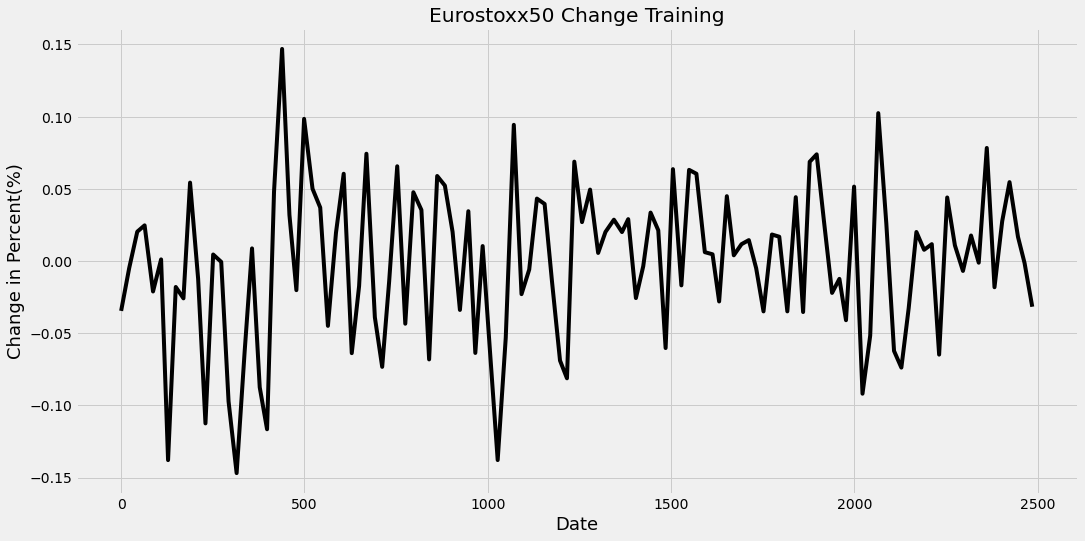

In [20]:
plt.figure(figsize=(16,8))
plt.title('Eurostoxx50 Change Training')
plt.plot(monthlyChange, color = 'black')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Change in Percent(%)',fontsize=18)
plt.style.use('fivethirtyeight')
plt.show()